# 다항분류 - mnist 데이터 셋

MNIST는 인공지능 연구의 권위자 LeCun교수가 만든 데이터 셋으로 결측치 등의 데이터 이상점이 없는 예제 데이터

딥러닝을 공부할 때 반드시 거쳐야할 Hello, World같은 존재

MNIST는 60,000개의 트레이닝 셋과 10,000개의 테스트 셋으로 이루어져 있고 이중 트레이닝 셋을 학습데이터로 사용하고 테스트 셋을 신경망을 검증하는 데에 사용한다.

원본 이미지는 아래 URL에서 다운로드 가능

> https://www.kaggle.com/datasets/alexanderyyy/mnist-png
>
> https://data.hossam.kr/imgdata/mnist_png.7z

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *
from hossam.classification import *

# (신규) 예제에서 사용할 데이터셋을 다운로드 받기 위한 함수
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-04-17 01:41:20.432836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### [2] 데이터셋 준비하기

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path="mnist.npz")
print(f"훈련 데이터 {x_train.shape} 레이블 {y_train.shape}")
print(f"검증 데이터 {x_test.shape} 레이블 {y_test.shape}")

훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


## #02. 탐색적 데이터 분석

### [1] 임의의 샘플 데이터 확인

#### (1) 단순 출력

In [3]:
print(x_train[1234])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 149 255 129  37   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 149 253 252 215  60   7
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  53 150 249 252 252  38
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 138 252 252 177
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 129 252 243
   65   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  3

#### (2) 값의 범위 확인

In [4]:
print("최소값:", np.min(x_train[1234]), " / 최대값:", np.max(x_train[1234]))

최소값: 0  / 최대값: 255


#### (3) 간격 없이 확인

In [5]:
for i in x_train[1234]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000149255129037000000000000000000000000000000000000
000000000000000000000000000000000000149253252215060007000000000000000000000000000000
000000000000000000000000000000000000053150249252252038000000000000000000000000000000
000000000000000000000000000000000000000000138252252177000000000000000000000000000000
000000000000000000000000000000000000000000007129252243065000000000000000000000000000
000000000000000000000000000000000000000000000033252252074000000000000000000000000000
000000000000000000000000000000000000000000112210252212035000000000000000000000000000
000000000000000000000000000000000069177240249252252177000000000000000000000000000000
00000000000000000000000000000000019325225325224005904100000000000

#### (4) 종속변수 확인

In [6]:
y_train[1234]

3

### [2] 데이터 그려보기

mnist 데이터셋은 `0~9`까지 가로 `28px`, 세로 `28px` 크기의 이미지 60000장 + 10000장 데이터.

글자를 표현하는 간단한 이미지이므로 배경색을 단색으로 처리하고 글자가 표시되는 영역의 색상을 흰색으로 표현.

색상값은 0~255 사이의 10진 정수.

그러므로 이미지 데이터들은 이미지 픽셀 크기 만큼의 2차 배열의 각 원소가 색상값을 의미하는 숫자로 구성된 데이터로 표현가능.

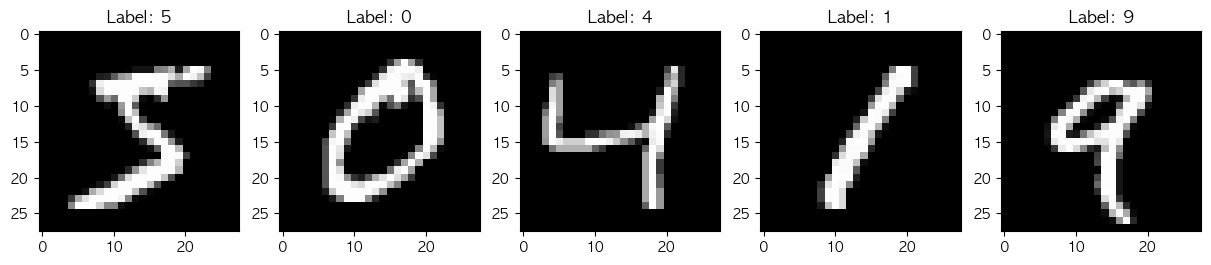

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3), dpi=100)

for i in range(0, len(ax)):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title(f"Label: {y_train[i]}")

plt.show()
plt.close()

## #03. 데이터 전처리

### [1] 종속변수에 대한 one-hot-encoding

훈련/검증 데이터가 이미 구분되어 있으므로 `train_test_split()`을 적용할 필요는 없다.

종속변수(label)가 각 이미지의 실제 숫자값으로 구성되어 있으므로 `one-hot-encoding`은 필요하다.

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### [2] 독립변수 전처리 - 훈련, 검증용 독립변수(이미지)의 차수 재설정

훈련 데이터의 shape가 (60000, 28, 28)라는 것은 가로 28, 세로 28 크기의 이미지가 60000장 이라는 의미.

즉, 28x28의 이차배열이 6만개가 존재하는 의미

즉, 60000개의 2차원 배열을 학습해야 하는 것 보다 60000개의 784(28*28)개의 원소를 갖는 1차원 배열을 학습하는 것이 학습 효율이 더 좋다.

#### (1) 훈련 데이터의 차수 확인

In [9]:
x_train.shape

(60000, 28, 28)

#### (2) 차수 변경

In [10]:
x_train_reshape = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(f"훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_train_reshape.shape}")
print(x_train_reshape[0])

훈련 데이터 (60000, 784) / 검증 데이터 (60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 

#### (3) 이미지 데이터 정규화

각 픽셀의 색상값은 0~255사이의 값을 갖는다.

그러므로 색상값을 255로 나누면 0~1 사이의 범위를 갖도록 데이터 정규화가 수행된다.

In [11]:
x_train_normal = x_train_reshape / 255
x_test_normal = x_test_reshape / 255

print(len(x_train_normal[0]))
x_train_normal[0]

784


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## #04. 분류 모델 구현

### [1] 모델 적합

+-------+----------+-----------+
|       |      acc |      loss |
|-------+----------+-----------|
| train | 0.999183 | 0.0039574 |
| test  |   0.9823 | 0.0790874 |
+-------+----------+-----------+


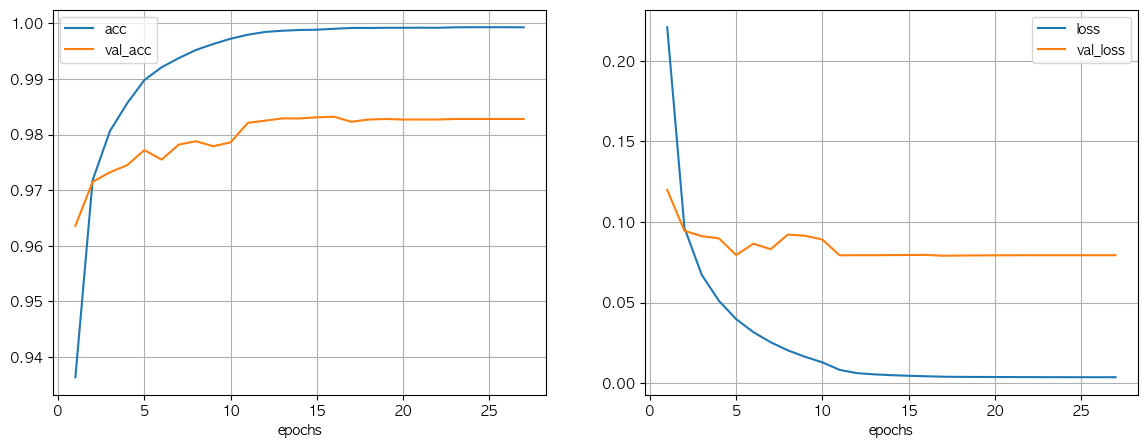

In [12]:
model = my_tf(
    x_train=x_train_normal,
    y_train=y_train_one_hot,
    x_test=x_test_normal,
    y_test=y_test_one_hot,
    layer=[
        {"units": 256, "activation": "relu", "input_shape": (x_train_normal.shape[1],)},
        {"units": len(y_train_one_hot[0]), "activation": "softmax"},
    ],
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

### [2] 성능 평가

In [13]:
ev = model.evaluate(x_train_normal, y_train_one_hot)
print("훈련 손실률: %0.2f%%, 훈련 정확도: %0.2f%%" % (ev[0], ev[1]))

ev = model.evaluate(x_test_normal, y_test_one_hot)
print("검증 손실률: %0.2f%%, 검증 정확도: %0.2f%%" % (ev[0], ev[1]))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - acc: 0.9991 - loss: 0.0038
훈련 손실률: 0.00%, 훈련 정확도: 1.00%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - acc: 0.9794 - loss: 0.0904
검증 손실률: 0.08%, 검증 정확도: 0.98%


## #05. 학습 결과 적용

### [1] 테스트 데이터에 대한 예측 결과 산정

In [14]:
result = model.predict(x_test_normal)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
10000개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([1.2537314e-14, 1.9700483e-16, 6.4609537e-13, 1.3400112e-09,
       4.6130002e-20, 1.7338930e-15, 2.0493932e-24, 9.9999994e-01,
       7.7231644e-14, 2.2358122e-13], dtype=float32)

### [2] 가장 큰 확률 값의 인덱스를 별도 리스트로 추출

In [15]:
arg_result = np.argmax(result, axis=-1)
arg_result

array([7, 2, 1, ..., 4, 5, 6])

### [3] 데이터 비교

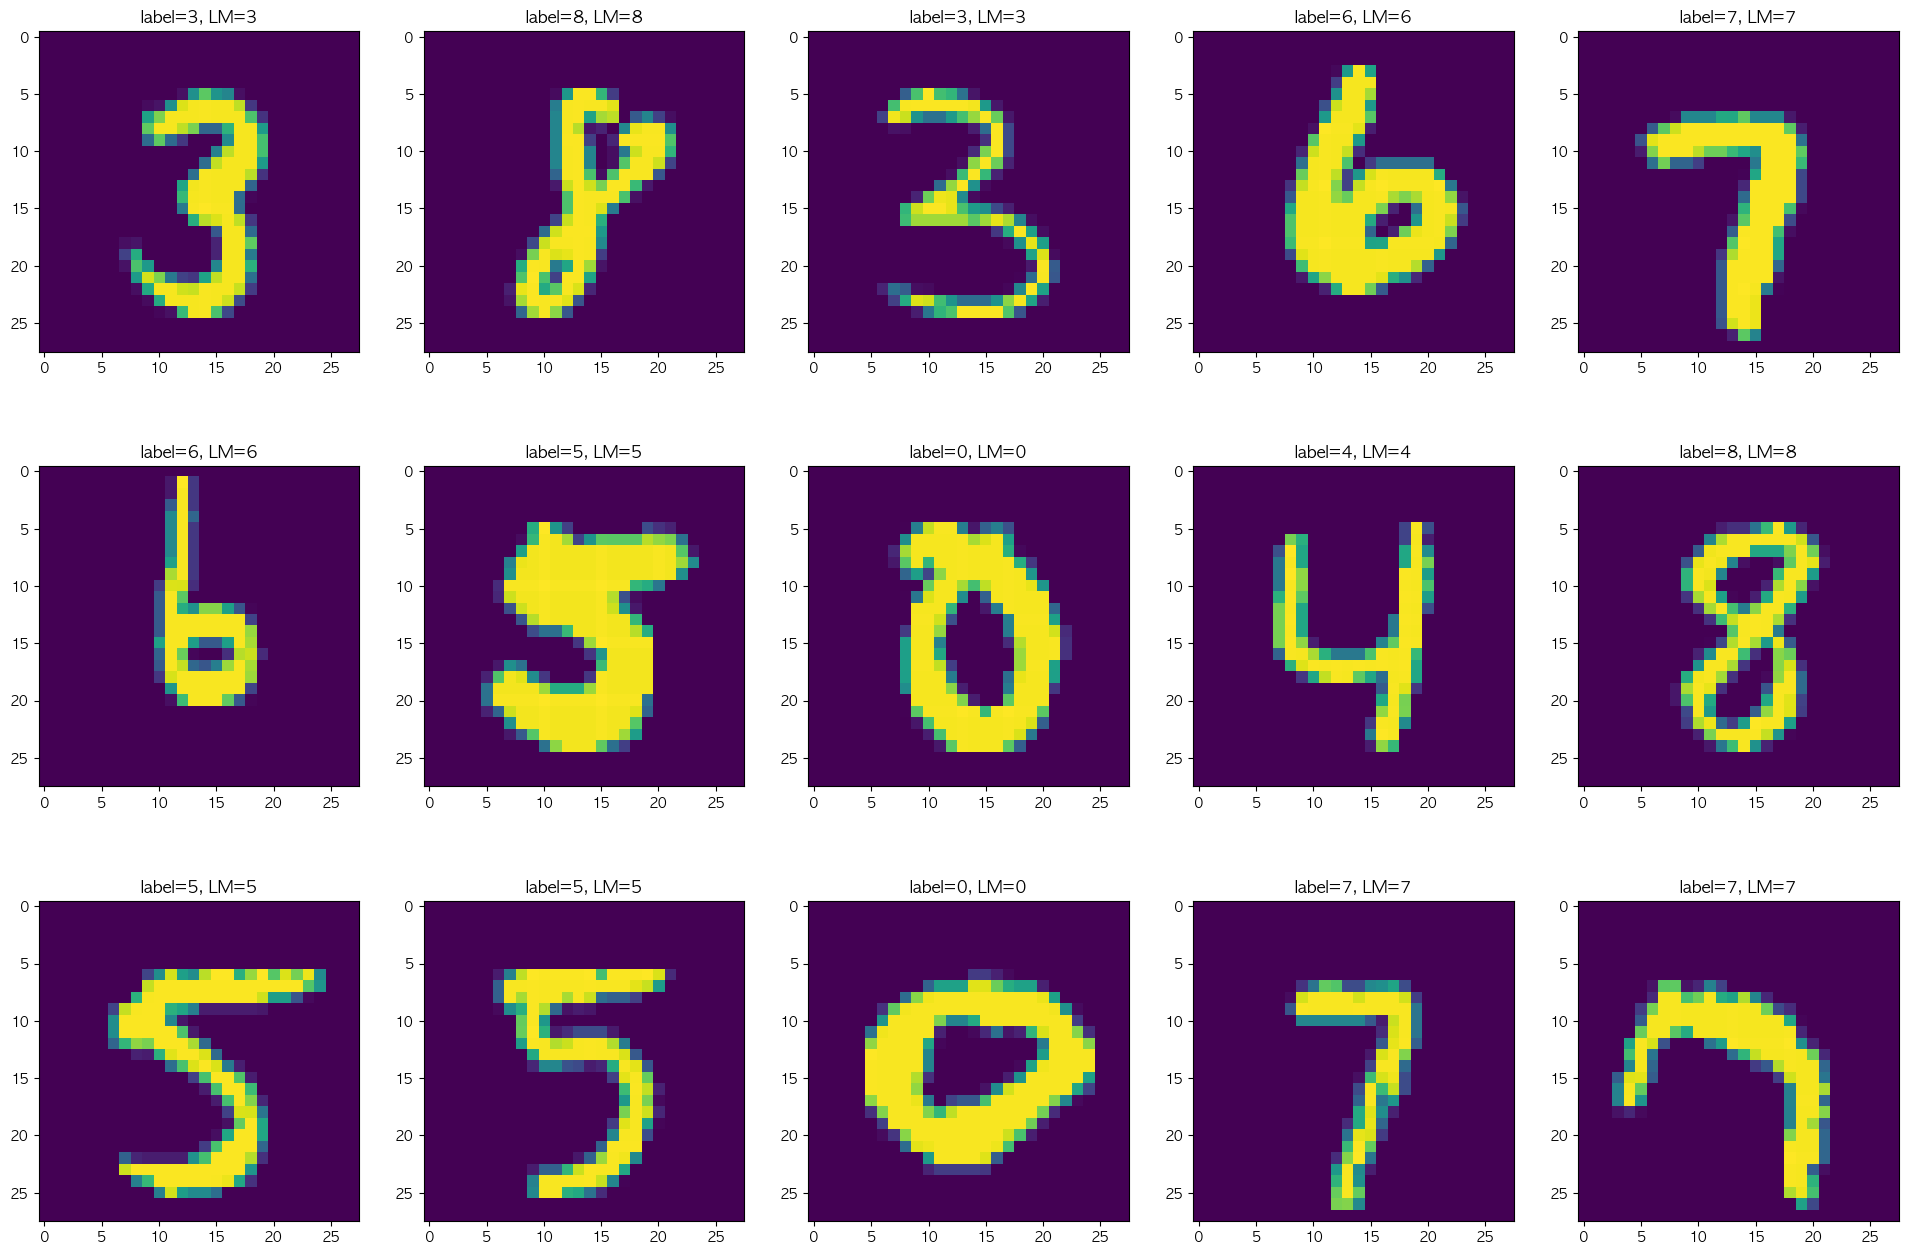

In [16]:
row = 3
col = 5
fig, ax = plt.subplots(row, col, figsize=((col + 1) * 4, (row + 1) * 4), dpi=100)

size = row * col
length = len(y_test)

for i in range(0, size):
    k = np.random.randint(length)
    train = x_test[k]
    label = y_test[k]
    ax[i // col][i % col].imshow(train)
    ax[i // col][i % col].set_title("label=%d, LM=%d" % (label, arg_result[k]))

plt.show()
plt.close()

### [4] 직접 작성한 손글씨 불러오기

#### (1) 이미지 로드를 위한 패키지 참조

In [17]:
from PIL import Image

#### (2) 이미지 불러오기

In [18]:
img2 = Image.open("res/손글씨2.jpg")
img2

In [19]:
img3 = Image.open("res/손글씨3.jpg")
img3

#### (3) 이미지를 grayscale로 변환

일반 이미지는 R,G,B 세가지 색상의 조합으로 존재하기 때문에 (색상수x(가로크기x세로크기))의 3차원 데이터임

이미지를 grayscale(흑백이미지)로 변경하면 색상수가 1가지로 줄어들기 때문에 (가로크기x세로크기)의 2차원 데이터로 압축됨

In [20]:
img2_gray = img2.convert(mode="L")
img2_gray

In [21]:
img3_gray = img3.convert("L")
img3_gray

#### (4) 이미지를 배열로 변환하기

In [22]:
img2_array = np.array(img2_gray)
img3_array = np.array(img3_gray)
img2_array.shape, img3_array.shape

((28, 28), (28, 28))

#### (5) 독립변수 데이터 구성하기

In [23]:
# 두 개의 이미지를 배열로 묶음
myx = np.array([img2_array, img3_array])

# 차원을 하나 줄여서 2차원 배열로 변환 --> 2x28x28 --> 2x784
myx_reshape = myx.reshape(myx.shape[0], myx.shape[1] * myx.shape[2])

# 데이터 표준화
myx_normal = myx_reshape / 255

myx_normal.shape

(2, 784)

#### (6) 종속변수 데이터 구성하기

In [24]:
myy = np.array([2, 3])

#### (7) 구성한 데이터를 학습모델에 적용

In [25]:
result = model.predict(myx_normal)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([3.7923384e-10, 1.2059818e-06, 9.9571687e-01, 3.5340435e-04,
       1.9369341e-13, 3.9889110e-06, 1.0980410e-08, 1.6888022e-09,
       3.9245286e-03, 1.0855408e-11], dtype=float32)

#### (8) 산출된 값을 통해 판별 결과 생성

In [26]:
arg_result = np.argmax(result, axis=-1)
arg_result

array([2, 3])

#### (9) 결과 출력하기

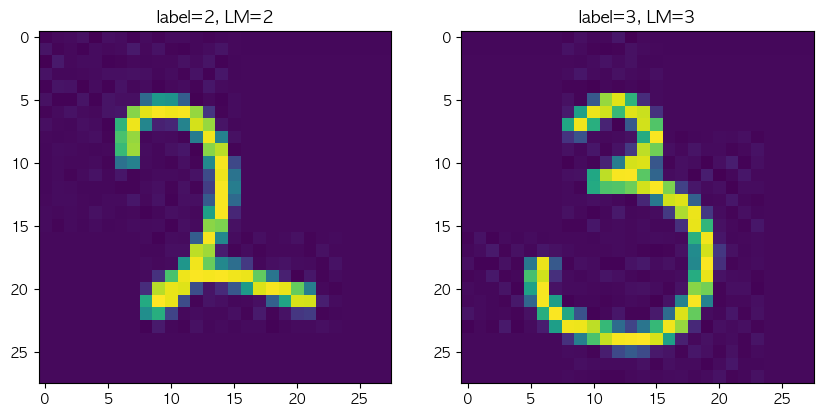

In [27]:
col = 2
fig, ax = plt.subplots(1, col, figsize=(10, 5), dpi=100)

length = len(y_test)

for i in range(0, len(ax)):
    train = myx[i]
    label = myy[i]
    ax[i].imshow(train)
    ax[i].set_title("label=%d, LM=%d" % (label, arg_result[i]))

plt.show()
plt.close()